In [65]:
# QUESTION-1

In [66]:
words = open('names.txt', 'r').read().splitlines()


In [67]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}


import torch


In [68]:
# create the dataset for trigrams
xs1, xs2, ys = [], [], []
for w in words:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2, ch3 in zip(chs, chs[1:], chs[2:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    ix3 = stoi[ch3]
    print(ch1, ch2, ch3)
    xs1.append(ix1)
    xs2.append(ix2)
    ys.append(ix3)

xs1 = torch.tensor(xs1)
xs2 = torch.tensor(xs2)
ys = torch.tensor(ys)
num = ys.nelement()
print('number of examples: ', num)

. e m
e m m
m m a
m a .
. o l
o l i
l i v
i v i
v i a
i a .
. a v
a v a
v a .
. i s
i s a
s a b
a b e
b e l
e l l
l l a
l a .
. s o
s o p
o p h
p h i
h i a
i a .
. c h
c h a
h a r
a r l
r l o
l o t
o t t
t t e
t e .
. m i
m i a
i a .
. a m
a m e
m e l
e l i
l i a
i a .
. h a
h a r
a r p
r p e
p e r
e r .
. e v
e v e
v e l
e l y
l y n
y n .
. a b
a b i
b i g
i g a
g a i
a i l
i l .
. e m
e m i
m i l
i l y
l y .
. e l
e l i
l i z
i z a
z a b
a b e
b e t
e t h
t h .
. m i
m i l
i l a
l a .
. e l
e l l
l l a
l a .
. a v
a v e
v e r
e r y
r y .
. s o
s o f
o f i
f i a
i a .
. c a
c a m
a m i
m i l
i l a
l a .
. a r
a r i
r i a
i a .
. s c
s c a
c a r
a r l
r l e
l e t
e t t
t t .
. v i
v i c
i c t
c t o
t o r
o r i
r i a
i a .
. m a
m a d
a d i
d i s
i s o
s o n
o n .
. l u
l u n
u n a
n a .
. g r
g r a
r a c
a c e
c e .
. c h
c h l
h l o
l o e
o e .
. p e
p e n
e n e
n e l
e l o
l o p
o p e
p e .
. l a
l a y
a y l
y l a
l a .
. r i
r i l
i l e
l e y
e y .
. z o
z o e
o e y
e y .
. n o
n o 

In [69]:
# initialize the 'network'
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((54, 27), generator=g, requires_grad=True) # Change: The weight matrix now has shape (54, 27)

In [70]:
import torch.nn.functional as F

In [71]:
xenc1 = F.one_hot(xs1, num_classes=27).float() # input to the network: one-hot encoding

In [72]:
xenc2 = F.one_hot(xs2, num_classes=27).float()


In [73]:
xenc = torch.cat((xenc1, xenc2),1)

In [74]:
# gradient descent
for k in range(50):

    # forward pass
    xenc1 = F.one_hot(xs1, num_classes=27).float() # one-hot encoding for the first character
    xenc2 = F.one_hot(xs2, num_classes=27).float() # one-hot encoding for the second character
    xenc = torch.cat((xenc1, xenc2), dim=1) # Change: Concatenate the two one-hot encoded vectors
    logits = xenc @ W # predict log-counts
    counts = logits.exp() # counts, equivalent to N
    probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
    loss = -probs[torch.arange(num), ys].log().mean() + 0.01*(W**2).mean()
    print(loss.item())

    # backward pass
    W.grad = None # set to zero the gradient
    loss.backward()

    # update
    W.data += -50.0 * W.grad


4.1959710121154785
3.3653793334960938
3.049534559249878
2.878479480743408
2.7739577293395996
2.7012393474578857
2.6454999446868896
2.601283550262451
2.5652339458465576
2.535409688949585
2.510397434234619
2.4892261028289795
2.4711146354675293
2.455474853515625
2.4418272972106934
2.4298086166381836
2.419130325317383
2.4095730781555176
2.400963306427002
2.3931643962860107
2.386065721511841
2.3795783519744873
2.373626708984375
2.368147373199463
2.3630881309509277
2.358403444290161
2.354053020477295
2.3500046730041504
2.3462281227111816
2.342698097229004
2.3393921852111816
2.3362908363342285
2.3333756923675537
2.330631971359253
2.3280460834503174
2.3256046772003174
2.3232970237731934
2.321112871170044
2.3190431594848633
2.317080020904541
2.3152146339416504
2.313441753387451
2.311753749847412
2.3101460933685303
2.30861234664917
2.307147979736328
2.3057491779327393
2.3044111728668213
2.303130626678467
2.30190372467041


In [75]:
#QUESTION-2

In [76]:
# trigram - create the dataset
xs1, xs2, ys = [], [], []
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2, ch3 in zip(chs, chs[1:], chs[2:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        ix3 = stoi[ch3]
        xs1.append(ix1)
        xs2.append(ix2)
        ys.append(ix3)


In [77]:
# initialize the 'network'
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((54, 27), generator=g, requires_grad=True) # Change: The weight matrix now has shape (54, 27)

In [78]:
import numpy as np
from sklearn.model_selection import train_test_split

# Convert to numpy arrays
xs1 = np.array(xs1)
xs2 = np.array(xs2)
ys = np.array(ys)

# Split the dataset into 80% train, 10% validation, and 10% test
X1_train, X1_temp, X2_train, X2_temp, y_train, y_temp = train_test_split(xs1, xs2, ys, test_size=0.2, random_state=42)
X1_val, X1_test, X2_val, X2_test, y_val, y_test = train_test_split(X1_temp, X2_temp, y_temp, test_size=0.5, random_state=42)

# Convert back to PyTorch tensors

X1_train = torch.tensor(X1_train,dtype=torch.int64)
X2_train = torch.tensor(X2_train,dtype=torch.int64)
y_train = torch.tensor(y_train,dtype=torch.int64)
X1_val = torch.tensor(X1_val,dtype=torch.int64)
X2_val = torch.tensor(X2_val,dtype=torch.int64)
y_val = torch.tensor(y_val,dtype=torch.int64)
X1_test = torch.tensor(X1_test,dtype=torch.int64)
X2_test = torch.tensor(X2_test,dtype=torch.int64)
y_test = torch.tensor(y_test)
print(X1_train[0:10])


tensor([ 9,  1,  9, 26,  2,  1,  7,  0,  9, 15])


In [79]:
# gradient descent

num = y_train.nelement()
num_val = y_val.nelement()
import torch.nn.functional as F

for k in range(50):

    # forward pass
    
    xenc1 = F.one_hot(X1_train, num_classes=27) # one-hot encoding for the first character
    xenc2 = F.one_hot(X2_train, num_classes=27).float() # one-hot encoding for the second character
    xenc = torch.cat((xenc1, xenc2), dim=1) # Change: Concatenate the two one-hot encoded vectors
    logits = xenc @ W # predict log-counts
    counts = logits.exp() # counts, equivalent to N
    probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
    loss = -probs[torch.arange(num), y_train].log().mean() + 0.01*(W**2).mean()
    print(f"Epoch {k+1}, Training Loss: {loss.item()}")

    # Forward pass (validation)
    xenc_val1 = F.one_hot(X1_val, num_classes=27).float() # one-hot encoding for the first character
    xenc_val2 = F.one_hot(X2_val, num_classes=27).float() # one-hot encoding for the second character
    xenc_val = torch.cat((xenc_val1, xenc_val2), dim=1) # Change: Concatenate the two one-hot encoded vectors
    logits_val = xenc_val @ W # predict log-counts
    counts_val = logits_val.exp() # counts, equivalent to N
    probs_val = counts_val / counts_val.sum(1, keepdims=True) # probabilities for next character
    loss_val = -probs_val[torch.arange(num_val), y_val].log().mean() + 0.01*(W**2).mean()
    print(f"Epoch {k+1}, Validation Loss: {loss_val.item()}")

    # backward pass
    W.grad = None # set to zero the gradient
    loss.backward()
    

    # update
    W.data += -50.0 * W.grad

Epoch 1, Training Loss: 4.195179462432861
Epoch 1, Validation Loss: 4.2056193351745605
Epoch 2, Training Loss: 3.3654818534851074
Epoch 2, Validation Loss: 3.377584218978882
Epoch 3, Training Loss: 3.0503997802734375
Epoch 3, Validation Loss: 3.060450792312622
Epoch 4, Training Loss: 2.8794775009155273
Epoch 4, Validation Loss: 2.8844852447509766
Epoch 5, Training Loss: 2.7748970985412598
Epoch 5, Validation Loss: 2.778290271759033
Epoch 6, Training Loss: 2.702197313308716
Epoch 6, Validation Loss: 2.7031898498535156
Epoch 7, Training Loss: 2.6465039253234863
Epoch 7, Validation Loss: 2.646820306777954
Epoch 8, Training Loss: 2.6023285388946533
Epoch 8, Validation Loss: 2.6012966632843018
Epoch 9, Training Loss: 2.566324472427368
Epoch 9, Validation Loss: 2.564929723739624
Epoch 10, Training Loss: 2.5365400314331055
Epoch 10, Validation Loss: 2.5342533588409424
Epoch 11, Training Loss: 2.5115623474121094
Epoch 11, Validation Loss: 2.509014368057251
Epoch 12, Training Loss: 2.4904139041

In [80]:
# We have already split the data into train, dev, and test sets
# The trained model is stored in the variable W

test_num = X1_test.nelement()

# Forward pass (without gradients computation)
with torch.no_grad():
    xenc1_test = F.one_hot(X1_test, num_classes=27).float()
    xenc2_test = F.one_hot(X2_test, num_classes=27).float()
    xenc_test = torch.cat((xenc1_test, xenc1_test), dim=1)
    logits_test = xenc_test @ W # predict log-counts on test data
    counts_test = logits_test.exp() # counts, equivalent to N
    probs_test = counts_test / counts_test.sum(1, keepdims=True) # probabilities for next character
    loss_test = -probs_test[torch.arange(test_num), y_test].log().mean() + 0.01*(W**2).mean() # compute the loss on test data

print("Test Loss:", loss_test.item())


Test Loss: 3.149600028991699


In [81]:
#QUESTION-3

In [82]:
g = torch.Generator().manual_seed(2147483647)

In [83]:

regularization_strengths = [0.0000001, 0.000001, 0.00001, 0.00005, 0.0001, 0.001, 0.01, 0.1, 1, 10]
train_losses = []
dev_losses = []

for reg_strength in regularization_strengths:
    # Re-initialize the model with the new regularization strength
    W = torch.randn((54, 27), generator=g, requires_grad=True) # Change: The weight matrix now has shape (54, 27)

    # Train the model on the training set
    for k in range(50):
      # forward pass
      xenc1 = F.one_hot(X1_train, num_classes=27).float()
      xenc2 = F.one_hot(X2_train, num_classes=27).float()
      xenc = torch.cat((xenc1, xenc2), dim=1)
      logits = xenc @ W
      counts = logits.exp()
      probs = counts / counts.sum(1, keepdims=True)
      loss = -probs[torch.arange(num), y_train].log().mean() + reg_strength * (W**2).mean()
      # print(f"Epoch {k+1}, Training Loss: {loss.item()}")

      # backward pass
      W.grad = None
      loss.backward()

      # update
      W.data += -50.0 * W.grad


    # Evaluate the model on the dev set
    xenc_val1 = F.one_hot(X1_val, num_classes=27).float()
    xenc_val2 = F.one_hot(X2_val, num_classes=27).float()
    xenc_val = torch.cat((xenc_val1, xenc_val2), dim=1)
    logits_val = xenc_val @ W
    counts_val = logits_val.exp()
    probs_val = counts_val / counts_val.sum(1, keepdims=True)
    loss_val = -probs_val[torch.arange(num_val), y_val].log().mean() + reg_strength * (W**2).mean()
    print(f"Epoch {k+1}, Validation Loss: {loss_val.item()}")

    # Record the losses
    train_losses.append(loss.item())
    dev_losses.append(loss_val.item())


Epoch 50, Validation Loss: 2.287224292755127
Epoch 50, Validation Loss: 2.289905071258545
Epoch 50, Validation Loss: 2.2870969772338867
Epoch 50, Validation Loss: 2.290210008621216
Epoch 50, Validation Loss: 2.285079002380371
Epoch 50, Validation Loss: 2.2852158546447754
Epoch 50, Validation Loss: 2.293046712875366
Epoch 50, Validation Loss: 2.3439362049102783
Epoch 50, Validation Loss: 2.542637825012207
Epoch 50, Validation Loss: 2.988536834716797


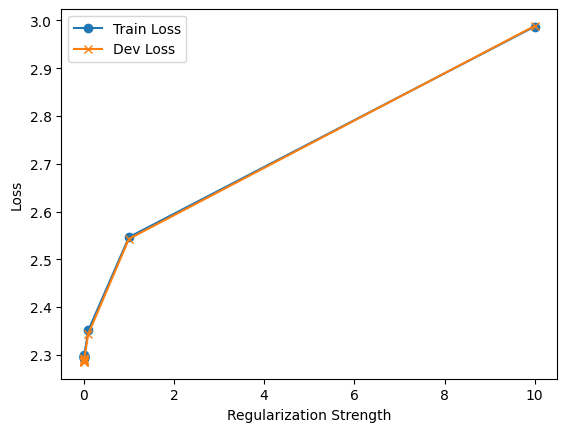

In [84]:
# Plot the losses as a function of the regularization strength

import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(regularization_strengths, train_losses, label='Train Loss', marker='o')
plt.plot(regularization_strengths, dev_losses, label='Dev Loss', marker='x')
plt.xlabel('Regularization Strength')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [85]:
# Identify the best regularization strength
best_reg_strength = regularization_strengths[np.argmin(dev_losses)]
best_reg_strength


0.0001

In [86]:
# retrain with optimum regularization strength
g = torch.Generator().manual_seed(2147483647 + 1)
W = torch.randn((54, 27), generator=g, requires_grad=True)

In [87]:
num = y_train.nelement()
num_val = y_val.nelement()

for k in range(50):

    # forward pass
    xenc1 = F.one_hot(X1_train, num_classes=27).float() # one-hot encoding for the first character
    xenc2 = F.one_hot(X2_train, num_classes=27).float() # one-hot encoding for the second character
    xenc = torch.cat((xenc1, xenc2), dim=1) # Change: Concatenate the two one-hot encoded vectors
    logits = xenc @ W # predict log-counts
    counts = logits.exp() # counts, equivalent to N
    probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
    loss = -probs[torch.arange(num), y_train].log().mean() + best_reg_strength*(W**2).mean()
    print(f"Epoch {k+1}, Training Loss: {loss.item()}")

    # Forward pass (validation)
    xenc_val1 = F.one_hot(X1_val, num_classes=27).float() # one-hot encoding for the first character
    xenc_val2 = F.one_hot(X2_val, num_classes=27).float() # one-hot encoding for the second character
    xenc_val = torch.cat((xenc_val1, xenc_val2), dim=1) # Change: Concatenate the two one-hot encoded vectors
    logits_val = xenc_val @ W # predict log-counts
    counts_val = logits_val.exp() # counts, equivalent to N
    probs_val = counts_val / counts_val.sum(1, keepdims=True) # probabilities for next character
    loss_val = -probs_val[torch.arange(num_val), y_val].log().mean() + best_reg_strength*(W**2).mean()
    print(f"Epoch {k+1}, Validation Loss: {loss_val.item()}")

    # backward pass
    W.grad = None # set to zero the gradient
    loss.backward()

    # update
    W.data += -50.0 * W.grad


Epoch 1, Training Loss: 4.0216522216796875
Epoch 1, Validation Loss: 4.014607906341553
Epoch 2, Training Loss: 3.3409667015075684
Epoch 2, Validation Loss: 3.3350014686584473
Epoch 3, Training Loss: 3.036214590072632
Epoch 3, Validation Loss: 3.0272939205169678
Epoch 4, Training Loss: 2.8642470836639404
Epoch 4, Validation Loss: 2.8536946773529053
Epoch 5, Training Loss: 2.7539925575256348
Epoch 5, Validation Loss: 2.7420620918273926
Epoch 6, Training Loss: 2.6779322624206543
Epoch 6, Validation Loss: 2.666165351867676
Epoch 7, Training Loss: 2.622770071029663
Epoch 7, Validation Loss: 2.6107900142669678
Epoch 8, Training Loss: 2.5807247161865234
Epoch 8, Validation Loss: 2.5693233013153076
Epoch 9, Training Loss: 2.5474092960357666
Epoch 9, Validation Loss: 2.5361921787261963
Epoch 10, Training Loss: 2.520174026489258
Epoch 10, Validation Loss: 2.509579658508301
Epoch 11, Training Loss: 2.4973881244659424
Epoch 11, Validation Loss: 2.4870896339416504
Epoch 12, Training Loss: 2.4779882

In [88]:
# Evaluate on the Test Set:

test_num = X1_test.nelement()

# Forward pass (without gradients computation)
with torch.no_grad():
    xenc1_test = F.one_hot(X1_test, num_classes=27).float()
    xenc2_test = F.one_hot(X2_test, num_classes=27).float()
    xenc_test = torch.cat((xenc1_test, xenc2_test), dim=1) # typo was here!!!!!
    logits_test = xenc_test @ W # predict log-counts on test data
    counts_test = logits_test.exp() # counts, equivalent to N
    probs_test = counts_test / counts_test.sum(1, keepdims=True) # probabilities for next character
    loss_test = -probs_test[torch.arange(test_num), y_test].log().mean() + best_reg_strength*(W**2).mean() # compute the loss on test data

print("Test Loss:", loss_test.item())

Test Loss: 2.296590805053711


In [89]:
#QUESTION-4

In [90]:
import torch
import torch.nn.functional as F

# Define the small W matrix
W = torch.tensor([[0.1, 0.2, 0.3],
                  [0.4, 0.5, 0.6],
                  [0.7, 0.8, 0.9]], requires_grad=True)

# Define the input sequence
input_seq = "abc"
stoi = {'a': 0, 'b': 1, 'c': 2}
X1_train = torch.tensor([stoi[c] for c in input_seq])

# One-hot encoding approach
xenc1 = F.one_hot(X1_train, num_classes=3).float()
logits_one_hot = xenc1 @ W
loss_one_hot = -torch.log(logits_one_hot.exp() / logits_one_hot.exp().sum(1, keepdims=True)).mean()
print("Loss using one-hot encoding:", loss_one_hot.item())

# Direct indexing approach
logits_index = W[X1_train]
loss_index = -torch.log(logits_index.exp() / logits_index.exp().sum(1, keepdims=True)).mean()
print("Loss using direct indexing:", loss_index.item())


Loss using one-hot encoding: 1.101942777633667
Loss using direct indexing: 1.101942777633667


In [91]:
import torch
import torch.nn.functional as F

# Define the small W matrix
W = torch.tensor([[0.1, 0.2, 0.3],
                  [0.4, 0.5, 0.6],
                  [0.7, 0.8, 0.9]], requires_grad=True)

# Define the input sequence
input_seq = "abc"
stoi = {'a': 0, 'b': 1, 'c': 2}
X1_train = torch.tensor([stoi[c] for c in input_seq])
X2_train = torch.roll(X1_train, -1)

# One-hot encoding approach
xenc1 = F.one_hot(X1_train, num_classes=3).float()
xenc2 = F.one_hot(X2_train, num_classes=3).float()
logits_one_hot1 = xenc1 @ W
logits_one_hot2 = xenc2 @ W
loss_one_hot = (-torch.log(logits_one_hot1.exp() / logits_one_hot1.exp().sum(1, keepdims=True)).mean()
                -torch.log(logits_one_hot2.exp() / logits_one_hot2.exp().sum(1, keepdims=True)).mean()) / 2
print("Loss using one-hot encoding:", loss_one_hot.item())

# Direct indexing approach
logits_index1 = W[X1_train]
logits_index2 = W[X2_train]
loss_index = (-torch.log(logits_index1.exp() / logits_index1.exp().sum(1, keepdims=True)).mean()
              -torch.log(logits_index2.exp() / logits_index2.exp().sum(1, keepdims=True)).mean()) / 2
print("Loss using direct indexing:", loss_index.item())


Loss using one-hot encoding: 1.101942777633667
Loss using direct indexing: 1.101942777633667


In [93]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}

In [94]:
# create the dataset for trigrams
xs1, xs2, ys = [], [], []
for w in words[:1]:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2, ch3 in zip(chs, chs[1:], chs[2:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    ix3 = stoi[ch3]
    print(ch1, ch2, ch3)
    xs1.append(ix1)
    xs2.append(ix2)
    ys.append(ix3)

xs1 = torch.tensor(xs1)
xs2 = torch.tensor(xs2)
ys = torch.tensor(ys)
num = ys.nelement()
print('number of examples: ', num)

. e m
e m m
m m a
m a .
number of examples:  4


In [95]:


g = torch.Generator().manual_seed(2147483647 + 1)
W = torch.randn((54, 27), generator=g, requires_grad=True)


In [96]:
xenc1 = F.one_hot(xs1, num_classes=27).float() # one-hot encoding for the first character

In [97]:
# much experimentation follows.

xenc1 = F.one_hot(xs1, num_classes=27).float()
xenc2 = F.one_hot(xs2, num_classes=27).float()
xenc = torch.cat((xenc1, xenc2), dim=1)
logits = xenc @ W
counts = logits.exp()
probs = counts / counts.sum(1, keepdims=True)
loss = -probs[torch.arange(num), ys].log().mean() + 0.01*(W**2).mean()
print(loss.item())

5.173408508300781


In [98]:
wenc1 = W[xs1]
wenc2 = W[xs2]
wenc = torch.cat((wenc1, wenc2), dim=1)
logits = wenc
counts = logits.exp()
probs = counts / counts.sum(1, keepdims=True)
loss = -probs[torch.arange(num), ys].log().mean() + 0.01*(W**2).mean()
print(loss.item())


4.482119560241699


In [99]:
# One-hot encoding approach
xenc1 = F.one_hot(xs1, num_classes=27).float()
xenc2 = F.one_hot(xs2, num_classes=27).float()
xenc = torch.cat((xenc1, xenc2), dim=1)
logits = xenc @ W
counts = logits.exp()
probs = counts / counts.sum(1, keepdims=True)
loss = -probs[torch.arange(num), ys].log().mean() + 0.01*(W**2).mean()
print(loss.item())

# Direct indexing approach
wenc1 = W[xs1]
wenc2 = W[xs2]
wenc = torch.cat((wenc1, wenc2), dim=1)
logits = wenc  # Use the indexed values directly as logits
counts = logits.exp()
probs = counts / counts.sum(1, keepdims=True)
loss = -probs[torch.arange(num), ys].log().mean() + 0.01*(W**2).mean()
print(loss.item())


5.173408508300781
4.482119560241699


In [100]:
# One-hot encoding approach
xenc1 = F.one_hot(xs1, num_classes=27).float()
xenc2 = F.one_hot(xs2, num_classes=27).float()
xenc = torch.cat((xenc1, xenc2), dim=1)
logits = xenc @ W
counts = logits.exp()
probs = counts / counts.sum(1, keepdims=True)
loss = -probs[torch.arange(num), ys].log().mean() + 0.01*(W**2).mean()
print(loss.item())

# Direct indexing approach
wenc1 = W[xs1]
wenc2 = W[xs2]
wenc = torch.cat((wenc1, wenc2), dim=1)
logits_d = wenc # Use the indexed values directly as logits
counts_d = logits_d.exp()
probs_d = counts_d / counts_d.sum(1, keepdims=True)
loss_d = -probs_d[torch.arange(num), ys].log().mean() + 0.01*(W**2).mean()
print(loss_d.item())


5.173408508300781
4.482119560241699


In [101]:
# One-hot encoding approach
xenc1 = F.one_hot(xs1, num_classes=27).float()
xenc2 = F.one_hot(xs2, num_classes=27).float()
logits1 = xenc1 @ W[:27]
logits2 = xenc2 @ W[:27]
logits = torch.cat((logits1, logits2), dim=1)
counts = logits.exp()
probs = counts / counts.sum(1, keepdims=True)
loss = -probs[torch.arange(num), ys].log().mean() + 0.01*(W**2).mean()
print(loss.item())

# Direct indexing approach
wenc1 = W[xs1]
wenc2 = W[xs2]
wenc = torch.cat((wenc1, wenc2), dim=1)
logits = wenc  # Use the indexed values directly as logits
counts = logits.exp()
probs = counts / counts.sum(1, keepdims=True)
loss = -probs[torch.arange(num), ys].log().mean() + 0.01*(W**2).mean()
print(loss.item())

4.482119560241699
4.482119560241699


In [102]:
import torch
import torch.nn.functional as F

# Define the small W matrix
W = torch.tensor([[0.1, 0.2, 0.3],
                  [0.4, 0.5, 0.6],
                  [0.7, 0.8, 0.9]], requires_grad=True)

# Define the input sequence
input_seq = "abc"
stoi = {'a': 0, 'b': 1, 'c': 2}
X1_train = torch.tensor([stoi[c] for c in input_seq])
X2_train = torch.roll(X1_train, -1)

# One-hot encoding approach
xenc1 = F.one_hot(X1_train, num_classes=3).float()
xenc2 = F.one_hot(X2_train, num_classes=3).float()
xenc = torch.cat((xenc1, xenc2), dim=1)
logits_one_hot = xenc @ torch.cat((W, W), dim=0)
loss_one_hot = -torch.log(logits_one_hot.exp() / logits_one_hot.exp().sum(1, keepdims=True)).mean()
print("Loss using one-hot encoding:", loss_one_hot.item())

# Direct indexing approach
wenc1 = W[X1_train]
wenc2 = W[X2_train]
wenc = torch.cat((wenc1, wenc2), dim=1)
logits_index = wenc  # Use the indexed values directly as logits
loss_index = -torch.log(logits_index.exp() / logits_index.exp().sum(1, keepdims=True)).mean()
print("Loss using direct indexing:", loss_index.item())


Loss using one-hot encoding: 1.1119014024734497
Loss using direct indexing: 1.8173422813415527


In [103]:

import torch
import torch.nn.functional as F

# Define the small W matrix
W = torch.tensor([[0.1, 0.2, 0.3],
                  [0.4, 0.5, 0.6],
                  [0.7, 0.8, 0.9]], requires_grad=True)

# Define the input sequence
input_seq = "abc"
stoi = {'a': 0, 'b': 1, 'c': 2}
X1_train = torch.tensor([stoi[c] for c in input_seq])
X2_train = torch.roll(X1_train, -1)

# One-hot encoding approach
xenc1 = F.one_hot(X1_train, num_classes=3).float()
xenc2 = F.one_hot(X2_train, num_classes=3).float()
logits_one_hot1 = xenc1 @ W
logits_one_hot2 = xenc2 @ W
loss_one_hot = (-torch.log(logits_one_hot1.exp() / logits_one_hot1.exp().sum(1, keepdims=True)).mean()
                -torch.log(logits_one_hot2.exp() / logits_one_hot2.exp().sum(1, keepdims=True)).mean()) / 2
print("Loss using one-hot encoding:", loss_one_hot.item())

# Direct indexing approach
logits_index1 = W[X1_train]
logits_index2 = W[X2_train]
loss_index = (-torch.log(logits_index1.exp() / logits_index1.exp().sum(1, keepdims=True)).mean()
              -torch.log(logits_index2.exp() / logits_index2.exp().sum(1, keepdims=True)).mean()) / 2
print("Loss using direct indexing:", loss_index.item())


Loss using one-hot encoding: 1.101942777633667
Loss using direct indexing: 1.101942777633667


In [104]:
#QUESTION-5

In [105]:
words = open('names.txt', 'r').read().splitlines()

chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}

In [106]:
import torch
import torch.nn.functional as F

# initialize the 'network'
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((54, 27), generator=g, requires_grad=True)

# create the dataset for trigrams
xs1, xs2, ys = [], [], []
for w in words:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2, ch3 in zip(chs, chs[1:], chs[2:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    ix3 = stoi[ch3]
    xs1.append(ix1)
    xs2.append(ix2)
    ys.append(ix3)

xs1 = torch.tensor(xs1)
xs2 = torch.tensor(xs2)
ys = torch.tensor(ys)
num = ys.nelement()
print('number of examples: ', num)

number of examples:  196113


In [107]:
import numpy as np
from sklearn.model_selection import train_test_split

# Convert to numpy arrays
xs1 = np.array(xs1)
xs2 = np.array(xs2)
ys = np.array(ys)

# Split the dataset into 80% train, 10% validation, and 10% test
X1_train, X1_temp, X2_train, X2_temp, y_train, y_temp = train_test_split(xs1, xs2, ys, test_size=0.2, random_state=42)
X1_val, X1_test, X2_val, X2_test, y_val, y_test = train_test_split(X1_temp, X2_temp, y_temp, test_size=0.5, random_state=42)

# Convert back to PyTorch tensors
X1_train = torch.tensor(X1_train)
X2_train = torch.tensor(X2_train)
y_train = torch.tensor(y_train)
X1_val = torch.tensor(X1_val)
X2_val = torch.tensor(X2_val)
y_val = torch.tensor(y_val)
X1_test = torch.tensor(X1_test)
X2_test = torch.tensor(X2_test)
y_test = torch.tensor(y_test)



In [108]:
# gradient descent

best_reg_strength = 0.0001

num = y_train.nelement()
num_val = y_val.nelement()

for k in range(50):

    # forward pass
    xenc1 = F.one_hot(X1_train, num_classes=27).float()
    xenc2 = F.one_hot(X2_train, num_classes=27).float()
    xenc = torch.cat((xenc1, xenc2), dim=1)
    logits = xenc @ W
    # counts = logits.exp()
    # probs = counts / counts.sum(1, keepdims=True)
    # loss = -probs[torch.arange(num), y_train].log().mean() + best_reg_strength*(W**2).mean()
    loss = F.cross_entropy(logits, y_train)
    print(f"Epoch {k+1}, Training Loss: {loss.item()}")

    # Forward pass (validation)
    xenc_val1 = F.one_hot(X1_val, num_classes=27).float()
    xenc_val2 = F.one_hot(X2_val, num_classes=27).float()
    xenc_val = torch.cat((xenc_val1, xenc_val2), dim=1)
    logits_val = xenc_val @ W
    # counts_val = logits_val.exp()
    # probs_val = counts_val / counts_val.sum(1, keepdims=True)
    # loss_val = -probs_val[torch.arange(num_val), y_val].log().mean() + best_reg_strength*(W**2).mean()
    loss_val = F.cross_entropy(logits_val, y_val) + best_reg_strength*(W**2).mean()
    print(f"Epoch {k+1}, Validation Loss: {loss_val.item()}")

    # backward pass
    W.grad = None # set to zero the gradient
    loss.backward()

    # update
    W.data += -50.0 * W.grad


    test_num = X1_test.nelement()

Epoch 1, Training Loss: 4.185479164123535
Epoch 1, Validation Loss: 4.19601583480835
Epoch 2, Training Loss: 3.357470989227295
Epoch 2, Validation Loss: 3.3696701526641846
Epoch 3, Training Loss: 3.0430190563201904
Epoch 3, Validation Loss: 3.0531721115112305
Epoch 4, Training Loss: 2.8724570274353027
Epoch 4, Validation Loss: 2.8775646686553955
Epoch 5, Training Loss: 2.7681379318237305
Epoch 5, Validation Loss: 2.771624803543091
Epoch 6, Training Loss: 2.6956446170806885
Epoch 6, Validation Loss: 2.6967272758483887
Epoch 7, Training Loss: 2.6401023864746094
Epoch 7, Validation Loss: 2.640502452850342
Epoch 8, Training Loss: 2.5960333347320557
Epoch 8, Validation Loss: 2.5950827598571777
Epoch 9, Training Loss: 2.560100555419922
Epoch 9, Validation Loss: 2.5587821006774902
Epoch 10, Training Loss: 2.530360698699951
Epoch 10, Validation Loss: 2.528148651123047
Epoch 11, Training Loss: 2.5054073333740234
Epoch 11, Validation Loss: 2.502929449081421
Epoch 12, Training Loss: 2.48427009582

In [109]:
# Forward pass (without gradients computation)
with torch.no_grad():
    xenc1_test = F.one_hot(X1_test, num_classes=27).float()
    xenc2_test = F.one_hot(X2_test, num_classes=27).float()
    xenc_test = torch.cat((xenc1_test, xenc2_test), dim=1)
    logits_test = xenc_test @ W
    loss_test = F.cross_entropy(logits_test, y_test) + best_reg_strength*(W**2).mean()

print("Test Loss:", loss_test.item())


Test Loss: 2.2949140071868896


In [110]:
# The difference in the loss values observed between the NLL and cross-entropy implementations is likely due to numerical stability improvements in the cross-entropy computation. In machine learning, numerical stability refers to the ability of an algorithm to produce accurate and consistent results even when dealing with very small or very large numbers. This is important because computers have finite precision, and small numerical errors can accumulate over time, leading to inaccurate results.

# In the NLL implementation, you manually computed the exponential of the logits and then normalized them to get probabilities. This approach can be numerically unstable when dealing with very large or very small logits, as the exponential function can quickly overflow or underflow.

# On the other hand, the cross-entropy loss in PyTorch combines the softmax activation and the NLL computation into one step. This function is implemented in a way that is more numerically stable, as it avoids the explicit computation of the exponential and normalization steps. Instead, it directly computes the log probabilities in a way that is less prone to numerical issues.

# The difference in loss values you observed is likely due to this improved numerical stability in the cross-entropy computation. It is expected to see small differences in the loss values when switching between the two methods. However, the difference you observed is not significant, and it is unlikely to have a meaningful impact on the model's performance.

# In conclusion, using the cross-entropy loss in PyTorch is a good choice, as it provides a more numerically stable and efficient way to compute the loss compared to manually computing the NLL.